## Q2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [2]:
x_train = np.array([[2.3],
                    [1.4],
                    [2.6],
                    [3.1],
                    [1.8],
                    [2.8],
                    [5.4],
                    [6.3],
                    [5.8],
                    [6.7],
                    [4.9],
                    [45.2]])

# Normalize x_train
x_train -= np.mean(x_train)
x_train /= np.std(x_train)

y_train = np.array([[0.0],
                    [0.0],
                    [0.0],
                    [0.0],
                    [0.0],
                    [0.0],
                    [1.0],
                    [1.0],
                    [1.0],
                    [1.0],
                    [1.0],
                    [1.0]])

print(x_train.shape)
print(y_train.shape)

(12, 1)
(12, 1)


In [3]:
def linear(x, w, b):
  return np.dot(x, w.T) + b

def sigmoid(z):
  return 1. / (1 + np.exp(-z))

def predict(x, w, b, kind="logistic"):
  a = linear(x, w, b)
  if kind == "logistic":
    a = sigmoid(a)
  return a

def mse_loss(z, y):
  m = y.shape[1]
  loss = 1/2 * (z - y)**2
  loss = (1 / m) * np.sum(loss)
  return loss

def crossentroy_loss(a, y):
  m = y.shape[1]
  loss = -1 * (y * np.log(a) + (1 - y) * np.log(1 - a))
  loss = (1 / m) * np.sum(loss)
  return loss

def compute_loss(a, y, kind="logistic"):
  if kind == "linear":
    return mse_loss(a, y)
  return crossentroy_loss(a, y)

def compute_accuracy(a, y):
  return 100 - np.mean(np.abs(a - y)) * 100

In [4]:
def regression(x, y, learning_rate, epochs, iter_log, kind="logistic"):
  # Get dimensionals
  m, feat = x.shape

  w = np.random.randn(1, feat) * 0.01
  b = np.random.randn() * 0.01
  losses = []
  accuracies = []
  
  # Batch Gradient Descent
  for i in range(epochs):
    # Forward pass
    a = linear(x, w, b)

    if kind == "logistic":
      a = sigmoid(a)

    loss = compute_loss(a, y, kind)
    accuracy = compute_accuracy(a, y)

    # Backward pass
    difference = a - y
    dw = difference * x
    db = difference
    dW = (1 / m) * np.sum(dw, axis=0)
    dB = (1 / m) * np.sum(db, axis=0)
  
    # Update parameters
    w -= learning_rate * dW
    b -= learning_rate * dB

    # Print cost and accuracy
    if (not iter_log == 0) and (i % iter_log == 0 or i == epochs - 1):
      print(f'Epoch: {i:3d}    Loss: {loss:4f}    Accuracy: {accuracy:4f}')

    losses.append(loss)
    accuracies.append(accuracy)

  report = {
      'losses': losses,
      'accuracies': accuracies
  }

  return w, b, report

In [5]:
LEARNING_RATE = 0.4
EPOCHS = 500
REPORT_MOD = 20

In [6]:
KIND = "linear"
w_lin, b_lin, report_lin = regression(x_train,
                          y_train,
                          LEARNING_RATE,
                          EPOCHS,
                          REPORT_MOD,
                          kind=KIND)

Epoch:   0    Loss: 2.996092    Accuracy: 49.388244
Epoch:  20    Loss: 1.215822    Accuracy: 55.917137
Epoch:  40    Loss: 1.215822    Accuracy: 55.916747
Epoch:  60    Loss: 1.215822    Accuracy: 55.916747
Epoch:  80    Loss: 1.215822    Accuracy: 55.916747
Epoch: 100    Loss: 1.215822    Accuracy: 55.916747
Epoch: 120    Loss: 1.215822    Accuracy: 55.916747
Epoch: 140    Loss: 1.215822    Accuracy: 55.916747
Epoch: 160    Loss: 1.215822    Accuracy: 55.916747
Epoch: 180    Loss: 1.215822    Accuracy: 55.916747
Epoch: 200    Loss: 1.215822    Accuracy: 55.916747
Epoch: 220    Loss: 1.215822    Accuracy: 55.916747
Epoch: 240    Loss: 1.215822    Accuracy: 55.916747
Epoch: 260    Loss: 1.215822    Accuracy: 55.916747
Epoch: 280    Loss: 1.215822    Accuracy: 55.916747
Epoch: 300    Loss: 1.215822    Accuracy: 55.916747
Epoch: 320    Loss: 1.215822    Accuracy: 55.916747
Epoch: 340    Loss: 1.215822    Accuracy: 55.916747
Epoch: 360    Loss: 1.215822    Accuracy: 55.916747
Epoch: 380  

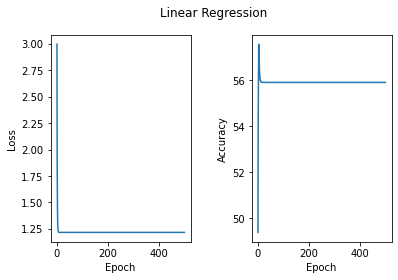

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=3)
fig.suptitle('Linear Regression')

ax1.plot(report_lin['losses'])
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')

ax2.plot(report_lin['accuracies'])
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')

plt.show()

In [8]:
KIND = "logistic"
w_log, b_log, report_log = regression(x_train,
                          y_train,
                          LEARNING_RATE,
                          EPOCHS,
                          REPORT_MOD,
                          kind=KIND)

Epoch:   0    Loss: 8.331774    Accuracy: 49.942531
Epoch:  20    Loss: 6.886894    Accuracy: 57.442581
Epoch:  40    Loss: 6.478519    Accuracy: 59.477951
Epoch:  60    Loss: 6.157606    Accuracy: 61.003621
Epoch:  80    Loss: 5.870836    Accuracy: 62.387551
Epoch: 100    Loss: 5.608130    Accuracy: 63.687499
Epoch: 120    Loss: 5.365934    Accuracy: 64.916133
Epoch: 140    Loss: 5.142072    Accuracy: 66.078265
Epoch: 160    Loss: 4.934783    Accuracy: 67.177344
Epoch: 180    Loss: 4.742521    Accuracy: 68.216640
Epoch: 200    Loss: 4.563905    Accuracy: 69.199425
Epoch: 220    Loss: 4.397690    Accuracy: 70.128949
Epoch: 240    Loss: 4.242758    Accuracy: 71.008407
Epoch: 260    Loss: 4.098103    Accuracy: 71.840889
Epoch: 280    Loss: 3.962822    Accuracy: 72.629359
Epoch: 300    Loss: 3.836104    Accuracy: 73.376637
Epoch: 320    Loss: 3.717216    Accuracy: 74.085386
Epoch: 340    Loss: 3.605504    Accuracy: 74.758111
Epoch: 360    Loss: 3.500374    Accuracy: 75.397156
Epoch: 380  

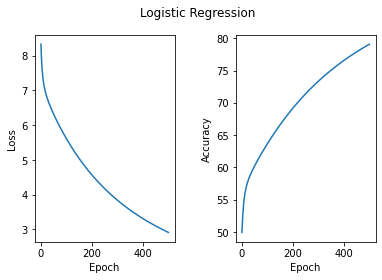

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=3)
fig.suptitle('Logistic Regression')

ax1.plot(report_log['losses'])
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')

ax2.plot(report_log['accuracies'])
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')

plt.show()

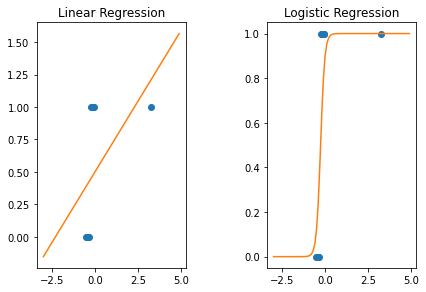

In [10]:
x_reg = np.arange(-3.0, 5.0, 0.1).reshape(-1, 1)
y_reg_lin = predict(x_reg, w_lin, b_lin, kind="linear")
y_reg_log = predict(x_reg, w_log, b_log, kind="logistic")

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(w_pad=5)

ax1.set_title("Linear Regression")
ax1.plot(x_train, y_train, 'o')
ax1.plot(x_reg, y_reg_lin)

ax2.set_title("Logistic Regression")
ax2.plot(x_train, y_train, 'o')
ax2.plot(x_reg, y_reg_log)

plt.show()

## Q3

In [11]:
import math
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

iris = datasets.load_iris()

# Taking first 2 features
X_total = iris.data[:, :2]
Y_total = iris.target

print(X_total.shape)
print(Y_total.shape)

(150, 2)
(150,)


In [12]:
# Split dataset into train and test
TRAIN_DATA_PERCENT = 70
examples = X_total.shape[0]

train_data_count = math.floor(examples * (TRAIN_DATA_PERCENT) / 100)
test_data_count = examples - train_data_count

# Shuffle all data in dataset. 
indexes = np.arange(examples)
np.random.shuffle(indexes)
X_total = X_total[indexes]
Y_total = Y_total[indexes]

# Split train and test data
X_train = X_total[:train_data_count]
Y_train = Y_total[:train_data_count]
X_test = X_total[train_data_count:]
Y_test = Y_total[train_data_count:]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(105, 2)
(105,)
(45, 2)
(45,)


In [13]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, Y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# Decision Boundary
x_min, x_max = X_total[:, 0].min() - .5, X_total[:, 0].max() + .5
y_min, y_max = X_total[:, 1].min() - .5, X_total[:, 1].max() + .5

h = .02  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [15]:
# Train Evaluation
# logreg.predict_proba(X_train)
train_pred = logreg.predict(X_train)
train_acc = logreg.score(X_train, Y_train)
print("Train Accuracy:", train_acc)

Train Accuracy: 0.8476190476190476


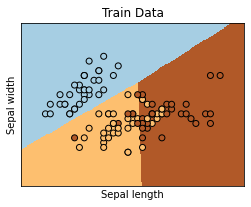

In [16]:
# Put the result into a color plot
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.title("Train Data")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [17]:
# Test Evaluation
# logreg.predict_proba(X_train)
test_pred = logreg.predict(X_test)
test_acc = logreg.score(X_test, Y_test)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.7333333333333333


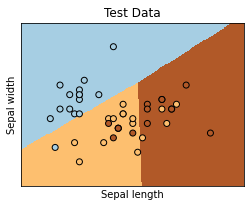

In [18]:
# Put the result into a color plot
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.title("Test Data")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [19]:
labels = ["Setosa", "Versicolor", "Virginica"]

Confusion Matrix Trainset
[[35  0  0]
 [ 0 25  9]
 [ 0  7 29]]

Classification Report Trainset
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        35
  Versicolor       0.78      0.74      0.76        34
   Virginica       0.76      0.81      0.78        36

    accuracy                           0.85       105
   macro avg       0.85      0.85      0.85       105
weighted avg       0.85      0.85      0.85       105




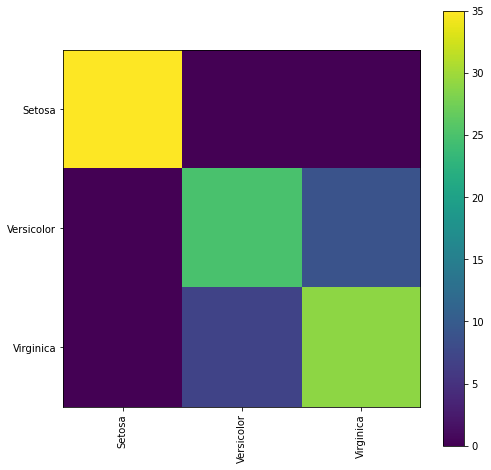

In [20]:
# Confusion matrix train set
cm_train = confusion_matrix(Y_train, train_pred)
print('Confusion Matrix Trainset')
print(cm_train)
print()

cr_train = classification_report(Y_train, train_pred, target_names=labels)
print('Classification Report Trainset')
print(cr_train)
print()

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(labels))
_ = plt.xticks(tick_mark, labels, rotation=90)
_ = plt.yticks(tick_mark, labels)

Confusion Matrix Trainset
[[14  1  0]
 [ 0 11  5]
 [ 0  6  8]]

Classification Report Trainset
              precision    recall  f1-score   support

      Setosa       1.00      0.93      0.97        15
  Versicolor       0.61      0.69      0.65        16
   Virginica       0.62      0.57      0.59        14

    accuracy                           0.73        45
   macro avg       0.74      0.73      0.74        45
weighted avg       0.74      0.73      0.74        45




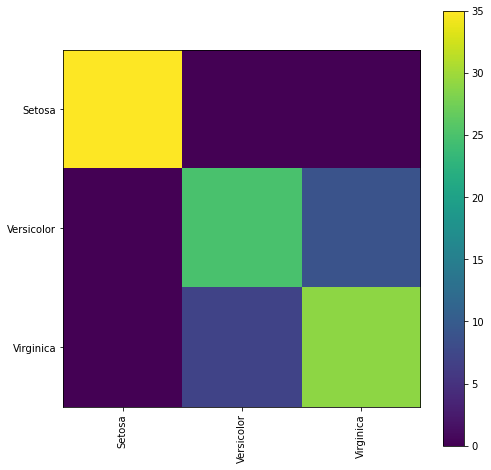

In [21]:
# Confusion matrix test set
cm_test = confusion_matrix(Y_test, test_pred)
print('Confusion Matrix Trainset')
print(cm_test)
print()

cr_test = classification_report(Y_test, test_pred, target_names=labels)
print('Classification Report Trainset')
print(cr_test)
print()

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(labels))
_ = plt.xticks(tick_mark, labels, rotation=90)
_ = plt.yticks(tick_mark, labels)